# Comparison of World Happiness Reports from 2015 and 2019

In this analysis, two datasets from the World Happiness Reports of 2015 and 2019 are examined. The goal is to explore and compare the factors contributing to happiness across countries during these two years.

Datasets Used:

1. World Happiness Report 2015: This dataset provides the happiness rank and score for various countries based on parameters such as GDP per capita, family, health (life expectancy), freedom, trust (government corruption), generosity, and dystopia residual.
2. World Happiness Report 2019: The 2019 dataset similarly ranks countries based on their happiness score. It includes metrics like GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

A detailed description of this datasets and the original datasets can be obtained from kaggle website:
https://www.kaggle.com/datasets/unsdsn/world-happiness

In [1]:
import pandas as pd

df_2015 = pd.read_csv('world_happiness_report_2015.csv')
print(df_2015.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [2]:
df_2019 = pd.read_csv('world_happiness_report_2019.csv')
print(df_2019.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [3]:
# Checking for missing values
missing_2015 = df_2015.isnull().sum()
missing_2019 = df_2019.isnull().sum()

missing_2015, missing_2019

(Country                          0
 Region                           0
 Happiness Rank                   0
 Happiness Score                  0
 Standard Error                   0
 Economy (GDP per Capita)         0
 Family                           0
 Health (Life Expectancy)         0
 Freedom                          0
 Trust (Government Corruption)    0
 Generosity                       0
 Dystopia Residual                0
 dtype: int64,
 Overall rank                    0
 Country or region               0
 Score                           0
 GDP per capita                  0
 Social support                  0
 Healthy life expectancy         0
 Freedom to make life choices    0
 Generosity                      0
 Perceptions of corruption       0
 dtype: int64)

No null values found :) 

In [4]:
print(df_2015.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [5]:
# Renaming columns in datasets to match both datasets

df_2019 = df_2019.rename(columns={
    "Country or region": "Country",
    "Overall rank": "Happiness Rank",
    "Score": "Happiness Score",
    "GDP per capita": "Economy (GDP per Capita)",
    "Healthy life expectancy": "Health (Life Expectancy)",
    "Freedom to make life choices": "Freedom",
})

df_2015 = df_2015.rename(columns={
    "Country or region": "Country",
    "Overall rank": "Happiness Rank",
    "Economy (GDP per Capita)" : "GDP per capita",
    "Family":"Social support",
    "Trust (Government Corruption)":"Perceptions of corruption"
})

In [6]:
# Dropping columns exclusive to one of the datasets
columns_to_drop_2015 = set(df_2015.columns) - set(df_2019.columns)
columns_to_drop_2019 = set(df_2019.columns) - set(df_2015.columns)

df_2015 = df_2015.drop(columns=columns_to_drop_2015)
df_2019 = df_2019.drop(columns=columns_to_drop_2019)

# Displaying the structure of both datasets post-cleanup
df_2015_head_cleaned = df_2015.head()
df_2019_head_cleaned = df_2019.head()

df_2015_head_cleaned, df_2019_head_cleaned

(       Country  Happiness Rank  Happiness Score  Social support  \
 0  Switzerland               1            7.587         1.34951   
 1      Iceland               2            7.561         1.40223   
 2      Denmark               3            7.527         1.36058   
 3       Norway               4            7.522         1.33095   
 4       Canada               5            7.427         1.32261   
 
    Health (Life Expectancy)  Freedom  Perceptions of corruption  Generosity  
 0                   0.94143  0.66557                    0.41978     0.29678  
 1                   0.94784  0.62877                    0.14145     0.43630  
 2                   0.87464  0.64938                    0.48357     0.34139  
 3                   0.88521  0.66973                    0.36503     0.34699  
 4                   0.90563  0.63297                    0.32957     0.45811  ,
    Happiness Rank      Country  Happiness Score  Social support  \
 0               1      Finland            7.76

In [7]:
# Computing mean values for both datasets
df_2015_mean = df_2015.mean(numeric_only=True)
df_2019_mean = df_2019.mean(numeric_only=True)

print(df_2015_mean) 
print(df_2019_mean)

Happiness Rank               79.493671
Happiness Score               5.375734
Social support                0.991046
Health (Life Expectancy)      0.630259
Freedom                       0.428615
Perceptions of corruption     0.143422
Generosity                    0.237296
dtype: float64
Happiness Rank               78.500000
Happiness Score               5.407096
Social support                1.208814
Health (Life Expectancy)      0.725244
Freedom                       0.392571
Generosity                    0.184846
Perceptions of corruption     0.110603
dtype: float64


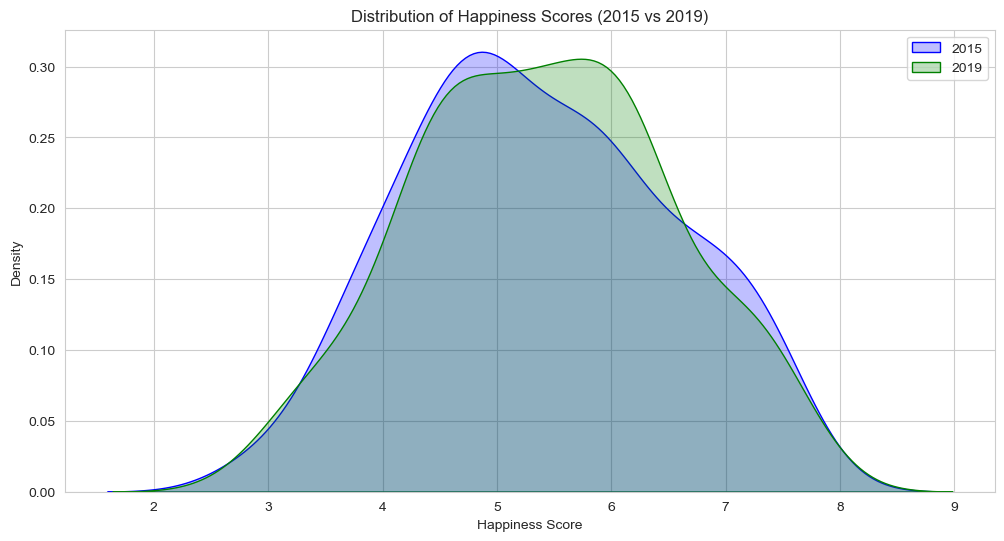

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style for the plots
sns.set_style("whitegrid")

# Plotting the distributions of happiness scores for 2015 and 2019
plt.figure(figsize=(12, 6))
sns.kdeplot(df_2015['Happiness Score'], fill=True, label='2015', color='blue')
sns.kdeplot(df_2019['Happiness Score'], fill=True, label='2019', color='green')
plt.title('Distribution of Happiness Scores (2015 vs 2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [9]:
# Merging the two datasets based on the 'Country' column
merged_df = df_2015[['Country', 'Happiness Score']].merge(df_2019[['Country', 'Happiness Score']], on='Country', suffixes=('_2015', '_2019'))

# Calculating the difference in Happiness Scores between the two years
merged_df['Score Difference'] = merged_df['Happiness Score_2019'] - merged_df['Happiness Score_2015']

# Identifying the countries with the largest positive and negative changes
most_improved = merged_df.sort_values(by='Score Difference', ascending=False).head()
least_improved = merged_df.sort_values(by='Score Difference').head()

In [10]:
# Showing the top 5 countries with the biggest improvment
most_improved

,Country,Happiness Score_2015,Happiness Score_2019,Score Difference
145,Benin,3.340,4.883,1.543
141,Ivory Coast,3.655,4.944,1.289
148,Togo,2.839,4.085,1.246
98,Honduras,4.788,5.860,1.072
142,Burkina Faso,3.587,4.587,1.000


In [11]:
# Showing the top 5 countries with the least improvment
least_improved

,Country,Happiness Score_2015,Happiness Score_2019,Score Difference
21,Venezuela,6.810,4.707,-2.103
90,Lesotho,4.898,3.802,-1.096
80,Zambia,5.129,4.107,-1.022
108,Zimbabwe,4.610,3.663,-0.947
111,Haiti,4.518,3.597,-0.921


In [12]:
# Calculating the correlation of different factors with the Happiness Score for both years
correlation_2015 = df_2015.corr(numeric_only=True)['Happiness Score'].drop('Happiness Score')
correlation_2019 = df_2019.corr(numeric_only=True)['Happiness Score'].drop('Happiness Score')

# Combining the correlation results into a DataFrame for better presentation
correlation_df = pd.DataFrame({
    '2015': correlation_2015,
    '2019': correlation_2019
})

correlation_df.sort_values(by='2019', ascending=False)  # Sorting by 2019 values for better comparison

,2015,2019
Health (Life Expectancy),0.724200,0.779883
Social support,0.740605,0.777058
Freedom,0.568211,0.566742
Perceptions of corruption,0.395199,0.385613
Generosity,0.180319,0.075824
Happiness Rank,-0.992105,-0.989096


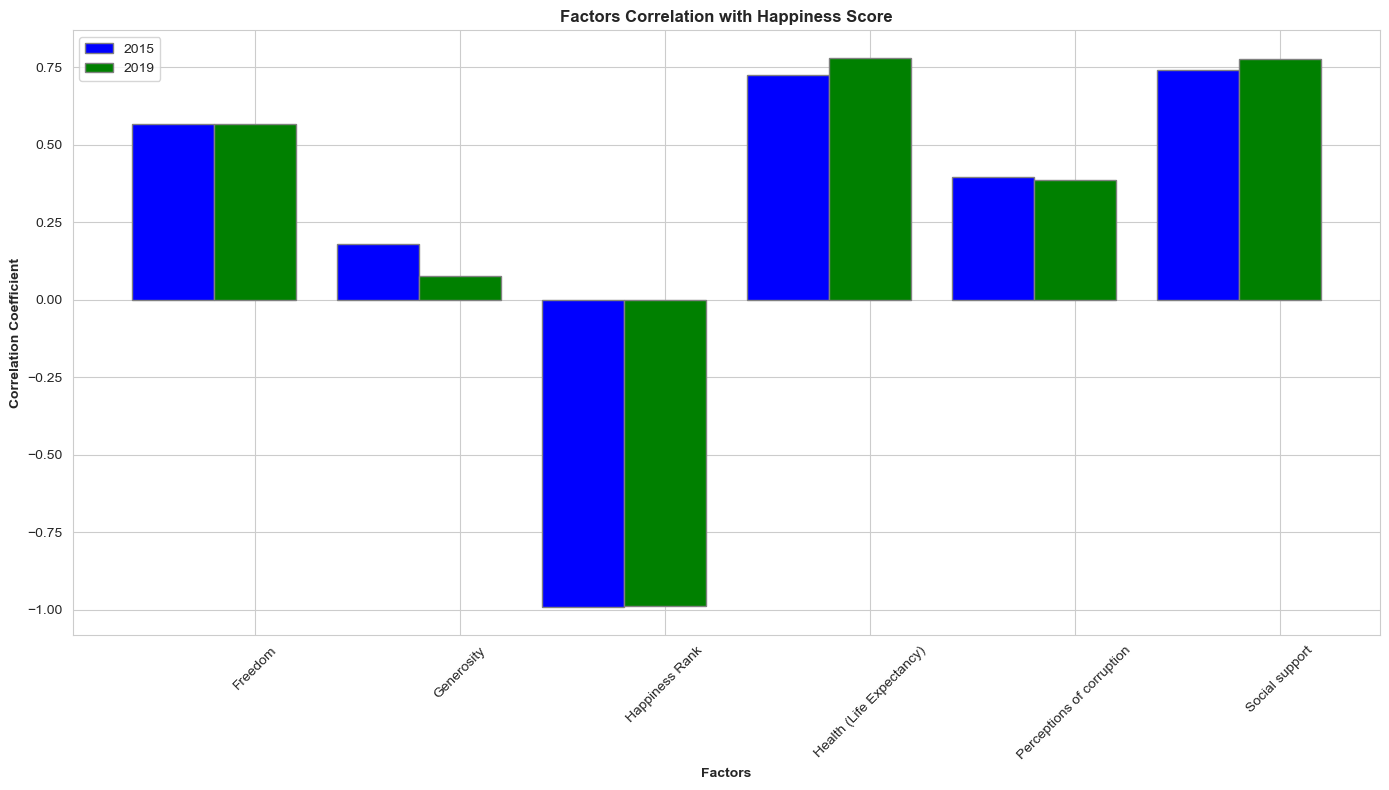

In [13]:
# Visualizing the correlations using a bar plot
plt.figure(figsize=(14, 8))

# Setting position for bar locations
barWidth = 0.4
r1 = range(len(correlation_df))
r2 = [x + barWidth for x in r1]

# Creating the bars
plt.bar(r1, correlation_df['2015'], width=barWidth, color='blue', edgecolor='grey', label='2015')
plt.bar(r2, correlation_df['2019'], width=barWidth, color='green', edgecolor='grey', label='2019')

# Title & Subtitle
plt.title('Factors Correlation with Happiness Score', fontweight='bold')
plt.xlabel('Factors', fontweight='bold')
plt.ylabel('Correlation Coefficient', fontweight='bold')

# X axis
plt.xticks([r + barWidth for r in range(len(correlation_df))], list(correlation_df.index), rotation=45)

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()